In [1]:
%load_ext pretty_jupyter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pretty_jupyter.helpers import matplotlib_fig_to_markdown

sns.set_theme()

In [2]:
%%jmd

# Algorithm
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

Sometimes we want to create tabsets dynamically, meaning we want to generate them based on a code.
Pretty Jupyter supports this by using Jinja Markdown cells.


# Algorithm
<span class='pj-token' style='display: none;'>.tabset|O_O|.tabset-pills|O_O|.tabset-fade</span>

Sometimes we want to create tabsets dynamically, meaning we want to generate them based on a code.
Pretty Jupyter supports this by using Jinja Markdown cells.

In [3]:
# create dataframe
data = pd.DataFrame({"a": [1, 2, 3, 4], "b": [4, 3, 2, 1], "c": [1, 4, 2, 3]})




## Tabset for column a



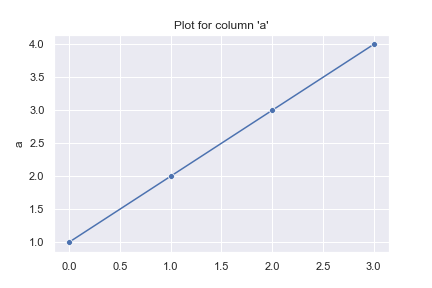



## Tabset for column b



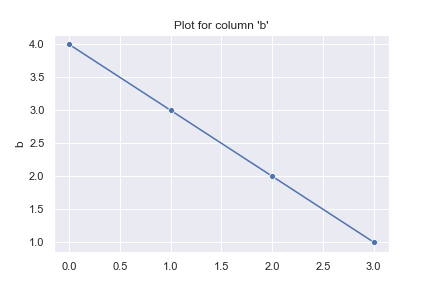



## Tabset for column c



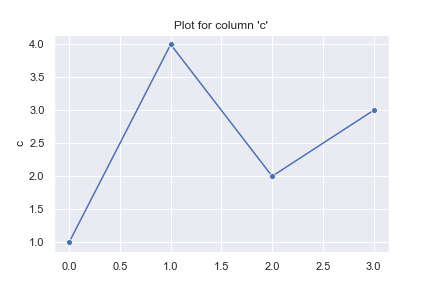


In [4]:
%%jmd

{% for col in data.columns %}

## Tabset for column {{ col }}

{% set ax = sns.lineplot(x=np.arange(data.shape[0]), y=data[col], marker="o") %}
{% set _ = ax.set(title="Plot for column '{}'".format(col), ylabel=col) %}
{{ matplotlib_fig_to_markdown(ax.figure) }}

{% endfor %}

Each Jinja Markdown cell is internally ran through Jinja templating framework. To read more about Jinja, check out its [documentation](https://jinja.palletsprojects.com/).